In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from scipy import stats

# Setting

In [2]:
print("Choose the data frequency:")
print("a) Daily Data")
print("b) Weekly Data")
while True:
    dq = input()
    if (dq == "a") or (dq == "b"):
        break
    print("Please choose one of the options above")

print("Choose the file direction:")
print("a) 5 Full Sample")
print("b) 5 Full Sample (non oil)")
print("c) 10 Full Sample")
print("d) 10 Full Sample (non oil)")
if dq == "a":
    direction = "Data/Data D/"
else:
    direction = "Data/Data W/"
while True:
    file = input()
    if (file == "a") or (file == "b") or (file == "c") or (file == "d"):
        if file == "a":
            file = f"{direction}5 Full Sample"
        elif file == "b":
            file = f"{direction}5 Full Sample (non oil)"
        elif file == "c":
            file = f"{direction}10 Full Sample"
        else:
            file = f"{direction}10 Full Sample (non oil)"
        break
    print("Please choose one of the options above")

print("Choose training period of the portfolio:")
if dq == "a":
    print("a) 60 days")
    print("b) 120 days")
    print("c) 180 days")
    print("d) 240 days")
    while True:
        tp = input()
        if (tp == "a") or (tp == "b") or (tp == "c") or (tp == "d"):
            if tp == "a":
                tp = 60
            elif tp == "b":
                tp = 120
            elif tp == "c":
                tp = 180
            else:
                tp = 240
            break
        print("Please choose one of the options above")
else:
    print("a) 40 days")
    print("b) 60 days")
    print("c) 80 days")
    print("d) 100 days") 
    while True:
        tp = input()
        if (tp == "a") or (tp == "b") or (tp == "c") or (tp == "d"):
            if tp == "a":
                tp = 40
            elif tp == "b":
                tp = 60
            elif tp == "c":
                tp = 80
            else:
                tp = 100
            break
        print("Please choose one of the options above")

print("Choose rebalance frequency of the portfolio:")
if dq == "a":
    print("a) 1 day")
    print("b) 5 days")
    while True:
        rf = input()
        if (rf == "a") or (rf == "b"):
            if rf == "a":
                rf = 1
            else:
                rf = 5
            break
        print("Please choose one of the options above")
else:
    print("a) 1 week")
    print("b) 4 weeks")
    while True:
        rf = input()
        if (rf == "a") or (rf == "b"):
            if rf == "a":
                rf = 1
            else:
                rf = 4
            break
        print("Please choose one of the options above")

if dq == "a":
    sub1_year = 2003
    sub1_month = 8
    sub1_day = 29
    sub2_year = 2008
    sub2_month = 12
    sub2_day = 5
    sb1_year = 2003
    sb1_month = 9
    sb1_day = 1
    sb2_year = 2008
    sb2_month = 12
    sb2_day = 4
else:
    sub1_year = 2003
    sub1_month = 8
    sub1_day = 27
    sub2_year = 2008
    sub2_month = 12
    sub2_day = 3
    sb1_year = 2003
    sb1_month = 9
    sb1_day = 3
    sb2_year = 2008
    sb2_month = 11
    sb2_day = 26

Choose the data frequency:
a) Daily Data
b) Weekly Data
a
Choose the file direction:
a) 5 Full Sample
b) 5 Full Sample (non oil)
c) 10 Full Sample
d) 10 Full Sample (non oil)
c
Choose training period of the portfolio:
a) 60 days
b) 120 days
c) 180 days
d) 240 days
c
Choose rebalance frequency of the portfolio:
a) 1 day
b) 5 days
a


# Import Data

In [3]:
filesname = os.listdir(f"/Users/kevinhuang/Documents/Master's Thesis/{file}")
if (".DS_Store" in filesname) == True:
    filesname.remove(".DS_Store")

for i in range(0,len(filesname)):
    filesname[i] = filesname[i][0:(len(filesname[i])-4)]
    
for i in filesname:
    globals()[i] = pd.read_csv(f"/Users/kevinhuang/Documents/Master's Thesis/{file}/{i}.csv")
    eval(i).columns = ["Date", "Price"]
    eval(i).Date = pd.to_datetime(eval(i).Date)

# Calculating Return

In [4]:
for i in filesname:
    dprice = np.array(eval(i).Price)
    eval(i)["Return"] = [np.nan] + list(np.log(dprice[1:dprice.shape[0]]/dprice[0:(dprice.shape[0]-1)]))
    globals()[i] = eval(i).drop(0,0)
    eval(i).index = np.arange(0,eval(i).shape[0])

# Plot BDI

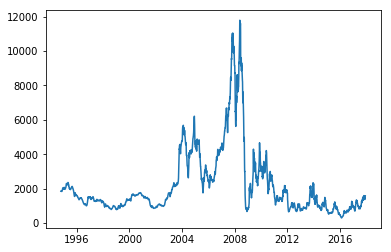

In [5]:
plt.plot(BDI["Date"], BDI["Price"])
plt.show()

# In-Sample Test - Full Sample
## Contemporaneous Linear Regression

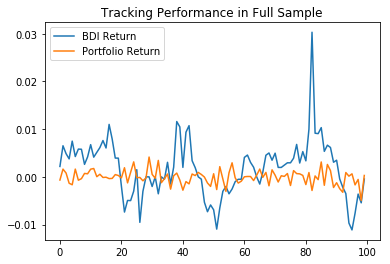

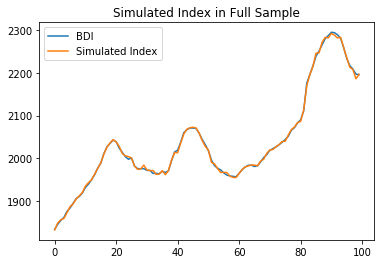

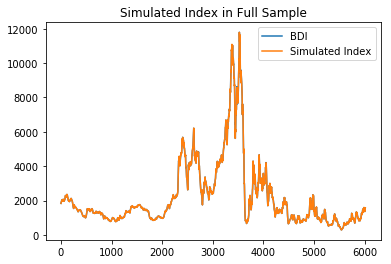

In [6]:
rdata = pd.DataFrame()
for i in filesname:
    rdata = pd.concat([rdata,eval(i).Return], axis=1)

rdata.columns = filesname
rdata = rdata.drop("BDI",1)

lm1 = sm.OLS(BDI.Return,rdata).fit()
summary1 = lm1.summary()
df1 = pd.DataFrame({"BDI Return":np.array(BDI.Return[20:]), "Portfolio Return": np.array(lm1.fittedvalues[20:]), "BDI": np.array(BDI.Price[20:]), "Simulated Index": (1+np.array(lm1.fittedvalues[20:]))*np.array(BDI.Price[20:])})
tr1 = np.std(df1["Portfolio Return"] - df1["BDI Return"])

plt.plot(np.arange(0,100), df1["BDI Return"][0:100])
plt.plot(np.arange(0,100), df1["Portfolio Return"][0:100])
plt.title("Tracking Performance in Full Sample")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), df1.BDI[0:100])
plt.plot(np.arange(0,100), df1["Simulated Index"][0:100])
plt.title("Simulated Index in Full Sample")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,df1.shape[0]), df1.BDI)
plt.plot(np.arange(0,df1.shape[0]), df1["Simulated Index"])
plt.title("Simulated Index in Full Sample")
plt.legend(loc = "best")
plt.show()

## Forecasting Linear Regression

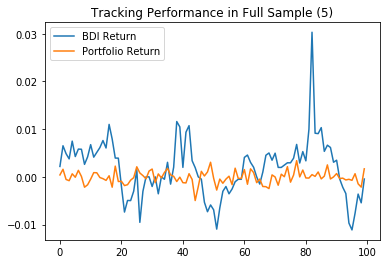

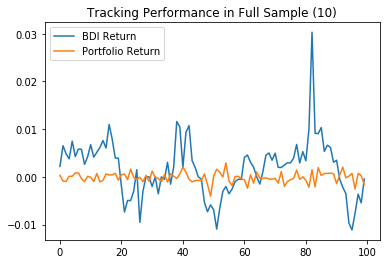

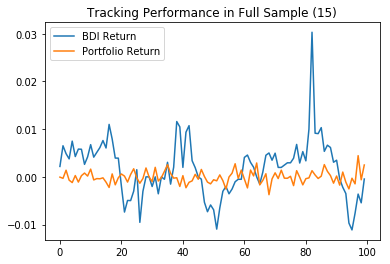

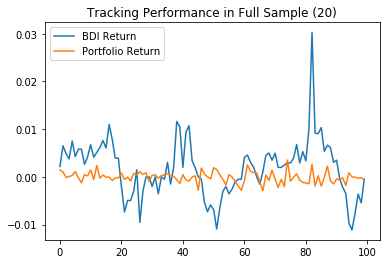

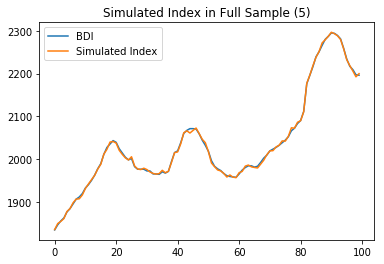

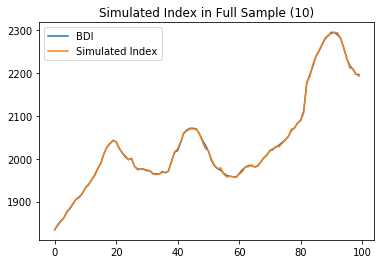

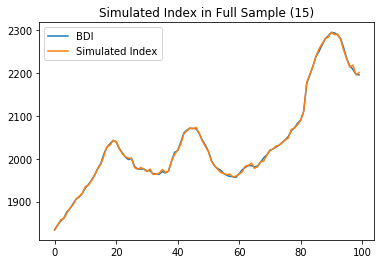

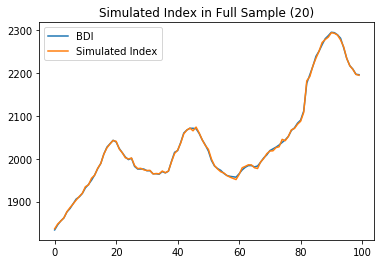

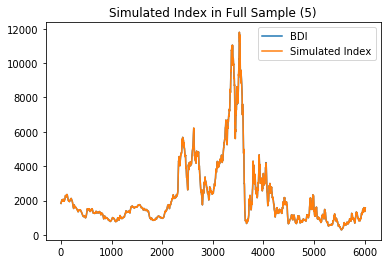

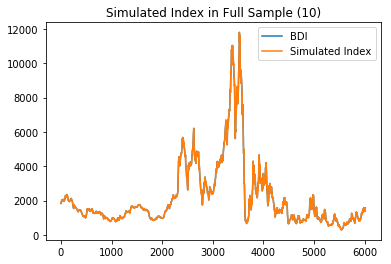

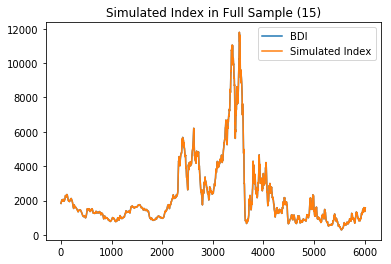

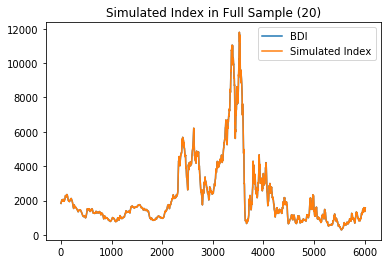

In [7]:
lm2 = {}
summary2 = {}
tr2 = {}
df2 = {}
for i in range(1,5):
    x = i * 5
    lm2[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[x:]), np.arange(0,(BDI.Return[x:].shape[0]))), rdata[0:(rdata.shape[0]-x)]).fit()
    summary2[str(x)] = lm2[str(x)].summary()

for i in range(1,5):
    x = i * 5
    df2[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[20:rdata.shape[0]]), "Portfolio Return": np.array(lm2[str(x)].fittedvalues[(20-x):]), "BDI": np.array(BDI.Price[20:rdata.shape[0]]), "Simulated Index": (1+np.array(lm2[str(x)].fittedvalues[(20-x):]))*np.array(BDI.Price[20:rdata.shape[0]])})
    tr2[str(x)] = np.std(df2[str(x)]["Portfolio Return"] - df2[str(x)]["BDI Return"])

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df2[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), df2[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df2[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), df2[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,df2[str(x)].shape[0]), df2[str(x)].BDI)
    plt.plot(np.arange(0,df2[str(x)].shape[0]), df2[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

# In-Sample Test - Sub-Sample 1
## Contemporaneous Linear Regression

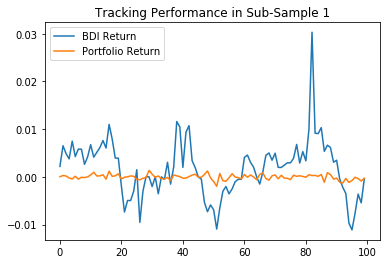

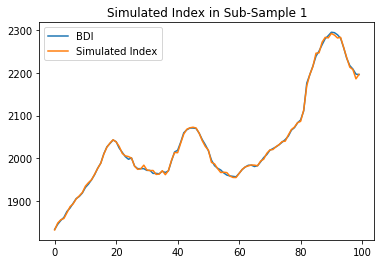

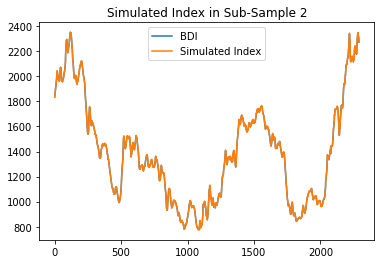

In [8]:
sub1 = BDI.Date[np.array(pd.to_datetime(pd.DataFrame({"year":[sub1_year], "month":[sub1_month], "day":[sub1_day]}))) == np.array(BDI.Date)].index[0]
sub2 = BDI.Date[np.array(pd.to_datetime(pd.DataFrame({"year":[sub2_year], "month":[sub2_month], "day":[sub2_day]}))) == np.array(BDI.Date)].index[0]

lm3 = sm.OLS(BDI.Return[0:sub1],rdata[0:sub1]).fit()
summary3 = lm3.summary()
df3 = pd.DataFrame({"BDI Return":np.array(BDI.Return[20:sub1]), "Portfolio Return": np.array(lm3.fittedvalues[20:sub1]), "BDI": np.array(BDI.Price[20:sub1]), "Simulated Index": (1+np.array(lm1.fittedvalues[20:sub1]))*np.array(BDI.Price[20:sub1])})
tr3 = np.std(df3["Portfolio Return"] - df3["BDI Return"])

plt.plot(np.arange(0,100), df3["BDI Return"][0:100])
plt.plot(np.arange(0,100), df3["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 1")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), df3.BDI[0:100])
plt.plot(np.arange(0,100), df3["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 1")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,df3.shape[0]), df3.BDI)
plt.plot(np.arange(0,df3.shape[0]), df3["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

## Forecasting Linear Regression

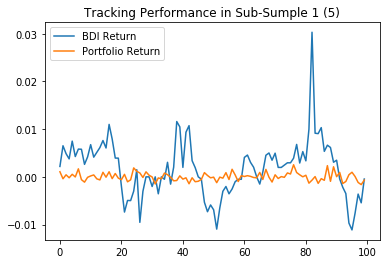

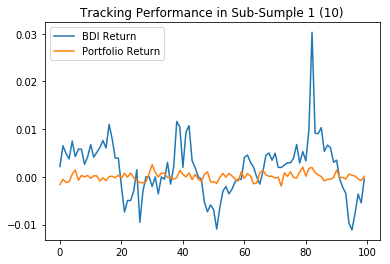

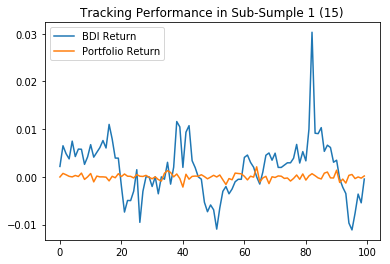

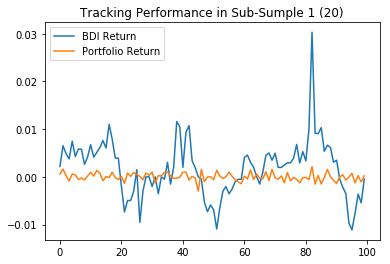

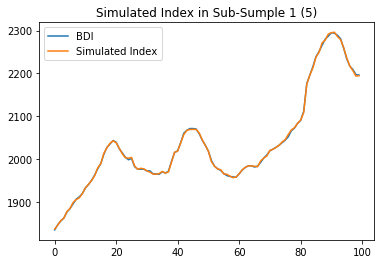

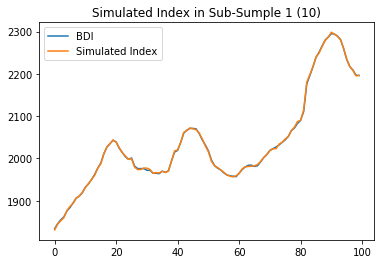

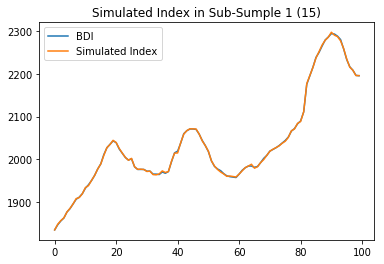

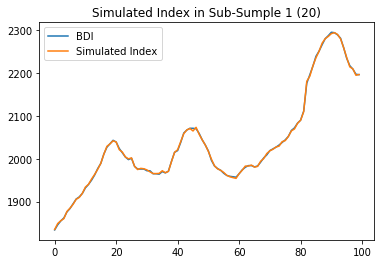

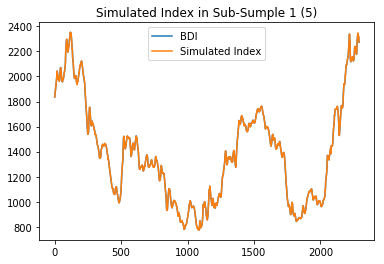

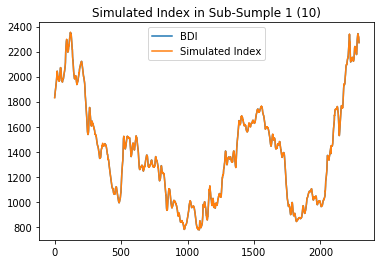

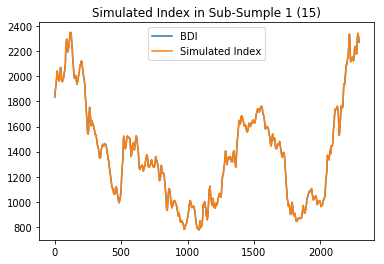

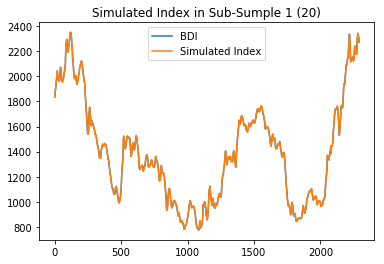

In [9]:
lm4 = {}
summary4 = {}
tr4 = {}
df4 = {}
for i in range(1,5):
    x = i * 5
    lm4[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[x:sub1]), np.arange(0,(BDI.Return[x:sub1].shape[0]))), rdata[0:(sub1-x)]).fit()
    summary4[str(x)] = lm4[str(x)].summary()

for i in range(1,5):
    x = i * 5
    df4[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[20:sub1]), "Portfolio Return": np.array(lm4[str(x)].fittedvalues[(20-x):]), "BDI": np.array(BDI.Price[20:sub1]), "Simulated Index": (1+np.array(lm4[str(x)].fittedvalues[(20-x):]))*np.array(BDI.Price[20:sub1])})
    tr4[str(x)] = np.std(df4[str(x)]["Portfolio Return"] - df4[str(x)]["BDI Return"])

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df4[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), df4[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sumple 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df4[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), df4[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sumple 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,df4[str(x)].shape[0]), df4[str(x)].BDI)
    plt.plot(np.arange(0,df4[str(x)].shape[0]), df4[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sumple 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

# In-Sample Test - Sub-Sample 2
## Contemporaneous Linear Regression

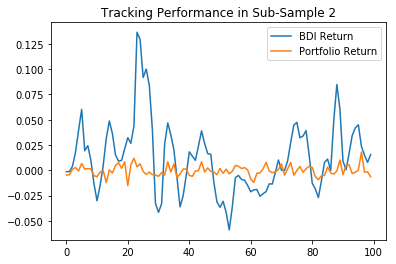

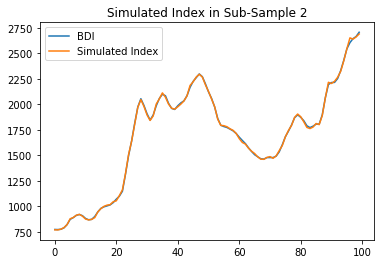

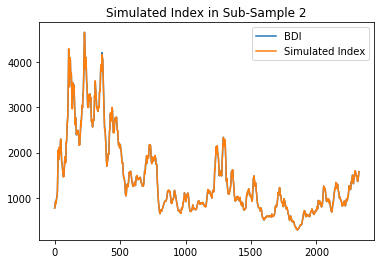

In [10]:
lm5 = sm.OLS(BDI.Return[sub2:],rdata[sub2:]).fit()
summary5 = lm5.summary()
df5 = pd.DataFrame({"BDI Return":np.array(BDI.Return[(sub2+20):]), "Portfolio Return": np.array(lm5.fittedvalues[20:]), "BDI": np.array(BDI.Price[(sub2+20):]), "Simulated Index": (1+np.array(lm5.fittedvalues[20:]))*np.array(BDI.Price[(sub2+20):])})
tr5 = np.std(df5["Portfolio Return"] - df5["BDI Return"])

plt.plot(np.arange(0,100), df5["BDI Return"][0:100])
plt.plot(np.arange(0,100), df5["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), df5.BDI[0:100])
plt.plot(np.arange(0,100), df5["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,df5.shape[0]), df5.BDI)
plt.plot(np.arange(0,df5.shape[0]), df5["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

## Forecasting Linear Regression

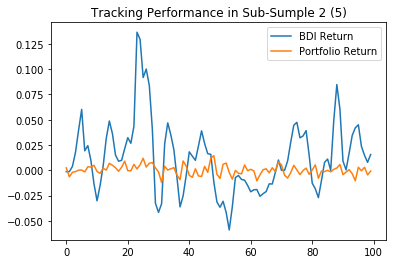

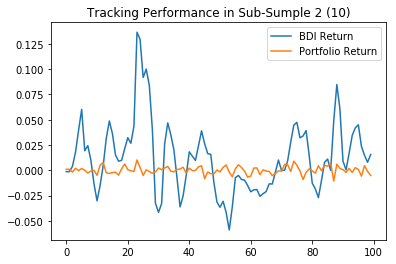

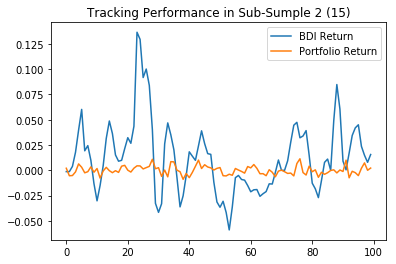

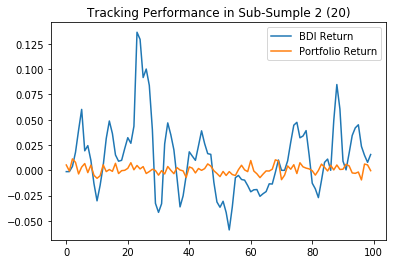

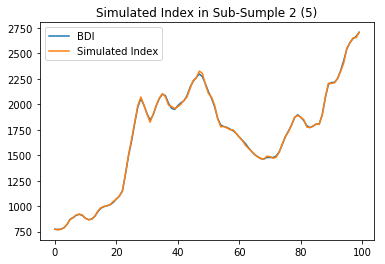

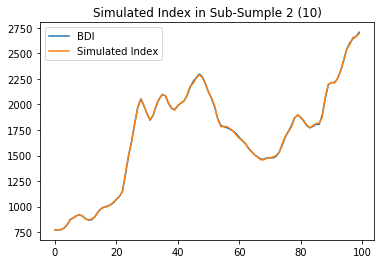

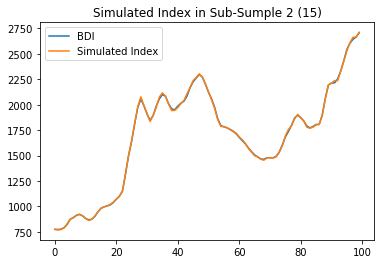

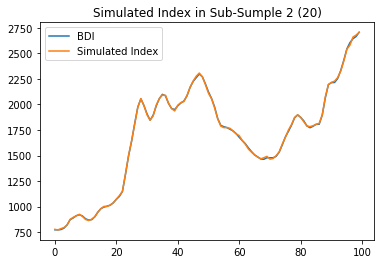

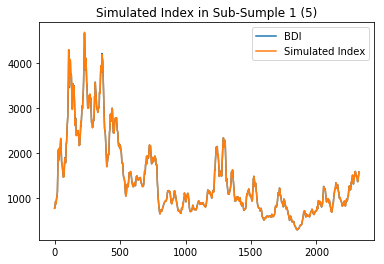

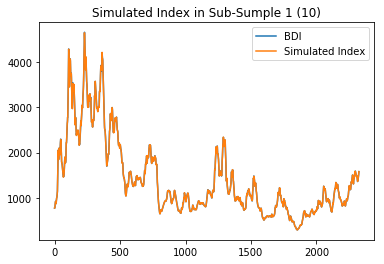

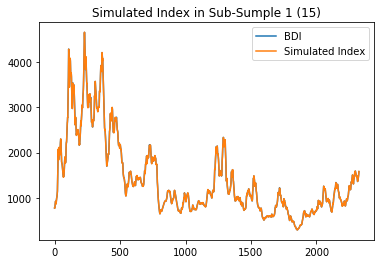

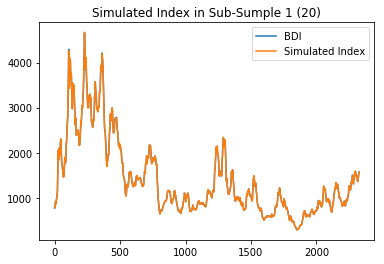

In [11]:
lm6 = {}
summary6 = {}
tr6 = {}
df6 = {}
for i in range(1,5):
    x = i * 5
    regressor = rdata[sub2:(rdata.shape[0]-x)]
    regressor.index = np.arange(0,regressor.shape[0])
    lm6[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[(sub2+x):]), np.arange(0,(BDI.Return[(sub2+x):].shape[0]))), regressor).fit()
    summary6[str(x)] = lm6[str(x)].summary()

for i in range(1,5):
    x = i * 5
    df6[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[(sub2+20):]), "Portfolio Return": np.array(lm6[str(x)].fittedvalues[(20-x):]), "BDI": np.array(BDI.Price[(sub2+20):]), "Simulated Index": (1+np.array(lm6[str(x)].fittedvalues[(20-x):]))*np.array(BDI.Price[(sub2+20):])})
    tr6[str(x)] = np.std(df6[str(x)]["Portfolio Return"] - df6[str(x)]["BDI Return"])

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df6[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), df6[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sumple 2 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df6[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), df6[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sumple 2 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,df6[str(x)].shape[0]), df6[str(x)].BDI)
    plt.plot(np.arange(0,df6[str(x)].shape[0]), df6[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sumple 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

# In-Sample Test - Sub-Sample 3
## Contemporaneous Linear Regression

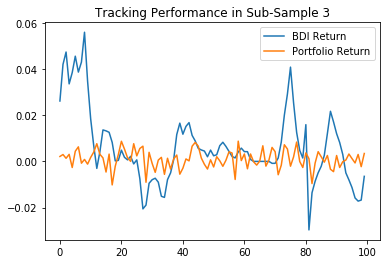

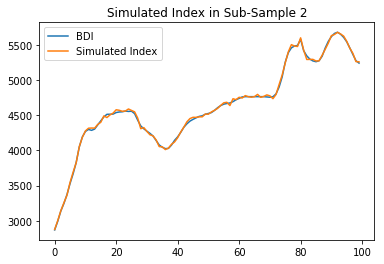

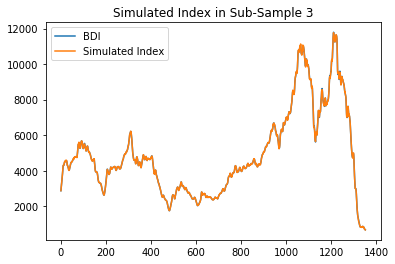

In [12]:
sb1 = BDI.Date[np.array(pd.to_datetime(pd.DataFrame({"year":[sb1_year], "month":[sb1_month], "day":[sb1_day]}))) == np.array(BDI.Date)].index[0]
sb2 = BDI.Date[np.array(pd.to_datetime(pd.DataFrame({"year":[sb2_year], "month":[sb2_month], "day":[sb2_day]}))) == np.array(BDI.Date)].index[0]

lm7 = sm.OLS(BDI.Return[sb1:sb2],rdata[sb1:sb2]).fit()
summary7 = lm7.summary()
df7 = pd.DataFrame({"BDI Return":np.array(BDI.Return[(sb1+20):sb2]), "Portfolio Return": np.array(lm7.fittedvalues[20:]), "BDI": np.array(BDI.Price[(sb1+20):sb2]), "Simulated Index": (1+np.array(lm7.fittedvalues[20:]))*np.array(BDI.Price[(sb1+20):sb2])})
tr7 = np.std(df7["Portfolio Return"] - df7["BDI Return"])

plt.plot(np.arange(0,100), df7["BDI Return"][0:100])
plt.plot(np.arange(0,100), df7["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 3")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), df7.BDI[0:100])
plt.plot(np.arange(0,100), df7["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,df7.shape[0]), df7.BDI)
plt.plot(np.arange(0,df7.shape[0]), df7["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 3")
plt.legend(loc = "best")
plt.show()

## Forecasting Linear Regression

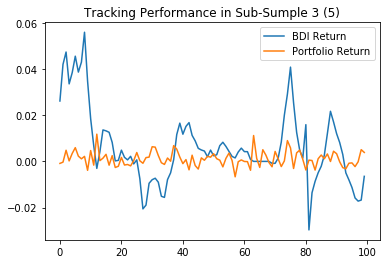

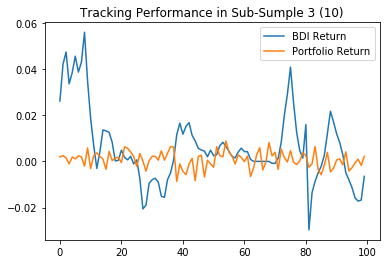

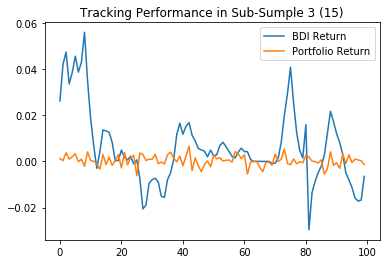

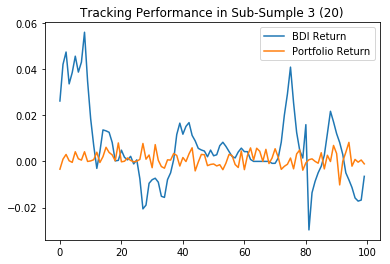

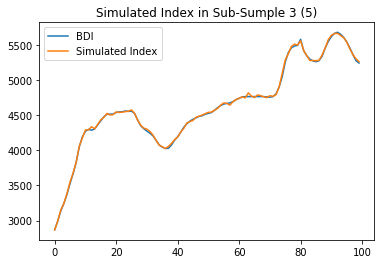

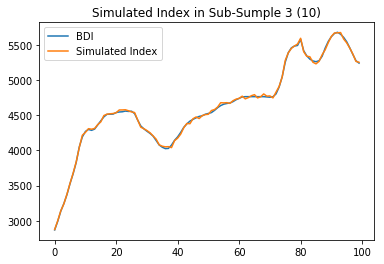

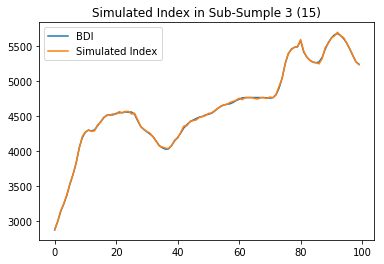

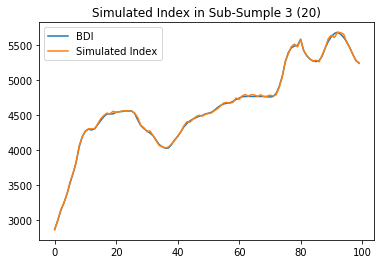

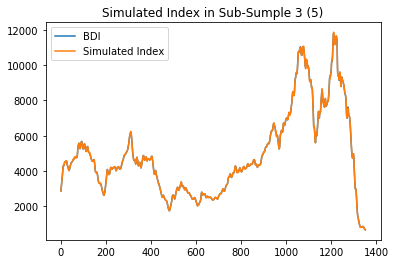

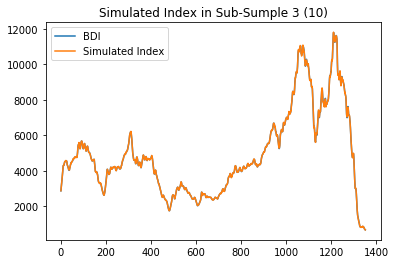

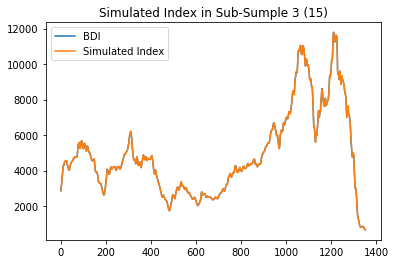

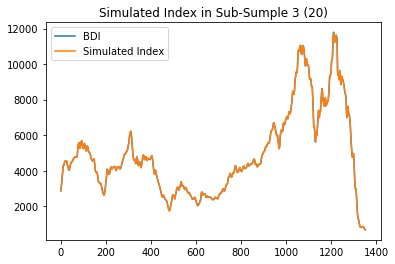

In [13]:
lm8 = {}
summary8 = {}
tr8 = {}
df8 = {}
for i in range(1,5):
    x = i * 5
    regressor = rdata[sb1:(sb2-x)]
    regressor.index = np.arange(0,regressor.shape[0])
    lm8[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[(sb1+x):sb2]), np.arange(0,(BDI.Return[(sb1+x):sb2].shape[0]))), regressor).fit()
    summary8[str(x)] = lm8[str(x)].summary()

for i in range(1,5):
    x = i * 5
    df8[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[(sb1+20):sb2]), "Portfolio Return": np.array(lm8[str(x)].fittedvalues[(20-x):]), "BDI": np.array(BDI.Price[(sb1+20):sb2]), "Simulated Index": (1+np.array(lm8[str(x)].fittedvalues[(20-x):]))*np.array(BDI.Price[(sb1+20):sb2])})
    tr8[str(x)] = np.std(df8[str(x)]["Portfolio Return"] - df8[str(x)]["BDI Return"])

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df8[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), df8[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sumple 3 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), df8[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), df8[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sumple 3 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,df8[str(x)].shape[0]), df8[str(x)].BDI)
    plt.plot(np.arange(0,df8[str(x)].shape[0]), df8[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sumple 3 ({x})")
    plt.legend(loc = "best")
    plt.show()

# Out-of-Sample Test
## Contemporaneous Rolling Window Regression

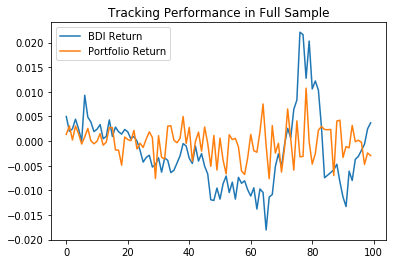

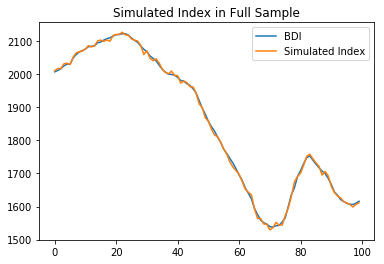

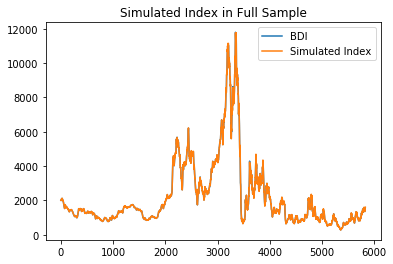

In [14]:
rbp1 = list(range((tp+20),rdata.shape[0],rf))
rbpc1 = rbp1 + [rdata.shape[0]+1]
os1 = []
ossummary1 = []
oscoef1 = []
ossr1 = []

for i in range(0,len(rbp1)):
    os1.append(sm.OLS(BDI.Return[(rbp1[i]-tp):(rbp1[i])],rdata[(rbp1[i]-tp):(rbp1[i])]).fit())
    ossummary1.append(os1[i].summary())
    oscoef1.append(os1[i].params)

for i in rdata.columns:
    store = []
    for j in range(0,len(rbp1)):
        store = store + list(oscoef1[j][i]*np.array(rdata[i][rbpc1[j]:rbpc1[j+1]]))
    ossr1.append(store)

ospr1 = np.array(pd.DataFrame(ossr1).apply(lambda x: sum(x), axis=0))
ostr1 = np.std(ospr1 - np.array(BDI.Return[rbp1[0]:]))
pstab1 = sm.OLS(pd.Series(np.array(BDI.Return[rbp1[0]:]), np.arange(0,len(BDI.Return[rbp1[0]:]))), pd.Series(ospr1, np.arange(0,len(ospr1)))).fit()
spstab1 = pstab1.summary()
pv1 = 2*(stats.t.cdf((pstab1.params[0]-1)/pstab1.bse[0],df = len(ospr1)-2))
osdf1 = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp1[0]:]), "Portfolio Return": ospr1, "BDI": np.array(BDI.Price[rbp1[0]:]), "Simulated Index": (1+ospr1)*np.array(BDI.Price[rbp1[0]:])})

plt.plot(np.arange(0,100), osdf1["BDI Return"][0:100])
plt.plot(np.arange(0,100), osdf1["Portfolio Return"][0:100])
plt.title("Tracking Performance in Full Sample")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), osdf1.BDI[0:100])
plt.plot(np.arange(0,100), osdf1["Simulated Index"][0:100])
plt.title("Simulated Index in Full Sample")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,osdf1.shape[0]), osdf1.BDI)
plt.plot(np.arange(0,osdf1.shape[0]), osdf1["Simulated Index"])
plt.title("Simulated Index in Full Sample")
plt.legend(loc = "best")
plt.show()

## Forecasting Rolling Window Regression

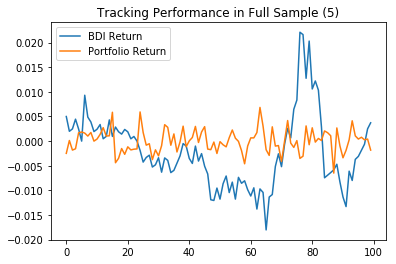

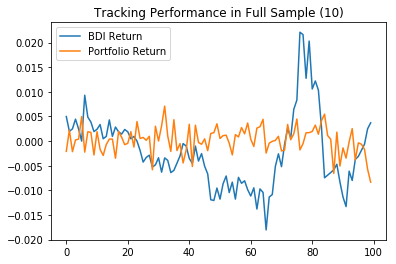

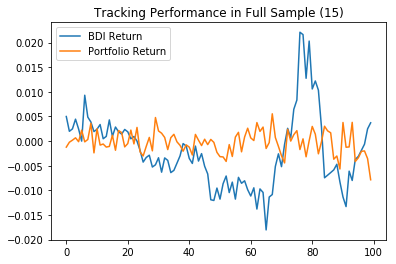

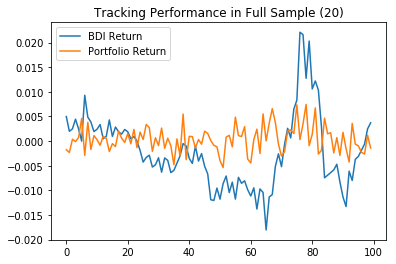

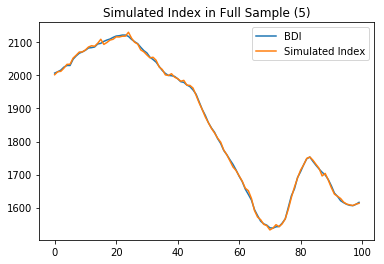

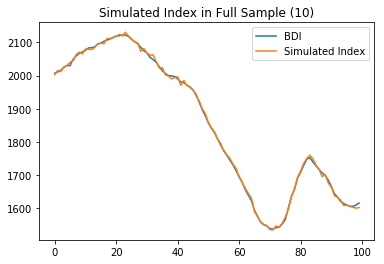

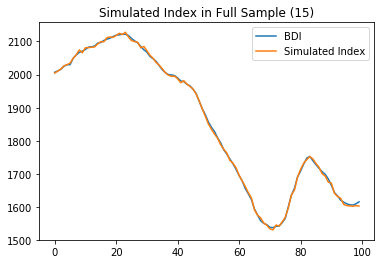

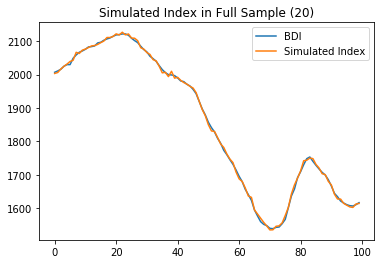

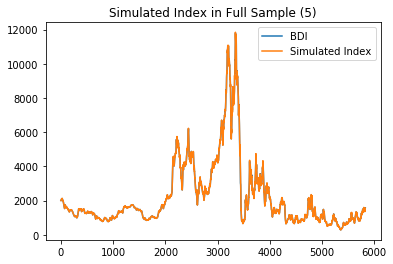

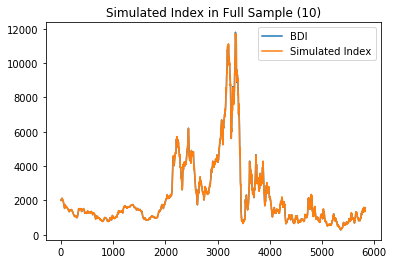

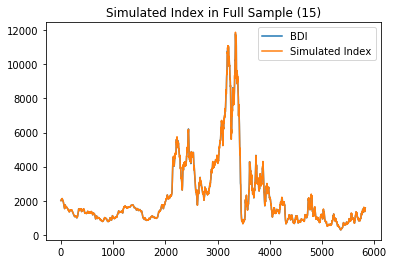

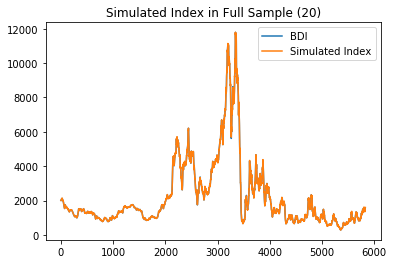

In [15]:
rbp2 = rbp1
rbpc2 = rbpc1
os2 = {}
oscoef2 = {}
ossr2 = {}
ospr2 = {}
ostr2 = {}
pstab2 = {}
spstab2 = {}
pv2 = {}
osdf2 = {}

for i in range(1,5):
    x = i * 5
    store1 = []
    store2 = []
    for j in range(0,len(rbp2)):
        regressor = rdata[(rbp2[j]-tp-x):(rbp2[j]-x)]
        regressor.index = np.arange(0, regressor.shape[0])
        store1.append(sm.OLS(pd.Series(np.array(BDI.Return[(rbp2[j]-tp):(rbp2[j])]), np.arange(0,len(BDI.Return[(rbp2[j]-tp):(rbp2[j])]))), regressor).fit())
        store2.append(store1[j].params)
    os2[str(x)] = store1
    oscoef2[str(x)] = store2

for i in range(1,5):
    x = i * 5
    store1 = []
    for j in rdata.columns:
        store2 = []
        for k in range(0,len(rbp2)):
            store2 = store2 + list(oscoef2[str(x)][k][j]*np.array(rdata[j][rbpc2[k]:rbpc2[k+1]]))
        store1.append(store2)
    ossr2[str(x)] = store1
    ospr2[str(x)] = np.array(pd.DataFrame(ossr2[str(x)]).apply(lambda x:sum(x), axis=0))
    ostr2[str(x)] = np.std(ospr2[str(x)] - np.array(BDI.Return[rbp2[0]:]))
    pstab2[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[rbp2[0]:]), np.arange(0,len(BDI.Return[rbp2[0]:]))), pd.Series(ospr2[str(x)], np.arange(0,len(ospr2[str(x)])))).fit()
    spstab2[str(x)] = pstab2[str(x)].summary()
    pv2[str(x)] = 2*(stats.t.cdf((pstab2[str(x)].params[0]-1)/pstab2[str(x)].bse[0],df = len(ospr2[str(x)])-2))
    osdf2[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp2[0]:]), "Portfolio Return": ospr2[str(x)], "BDI": np.array(BDI.Price[rbp2[0]:]), "Simulated Index": (1+ospr2[str(x)])*np.array(BDI.Price[rbp2[0]:])})

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf2[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), osdf2[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf2[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), osdf2[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,osdf2[str(x)].shape[0]), osdf2[str(x)].BDI)
    plt.plot(np.arange(0,osdf2[str(x)].shape[0]), osdf2[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Full Sample ({x})")
    plt.legend(loc = "best")
    plt.show()

# Sub-Sample 1 (1994/10/19-2003/08/29)
## Contemporaneous Rolling Window Regression

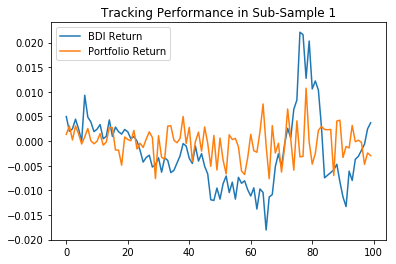

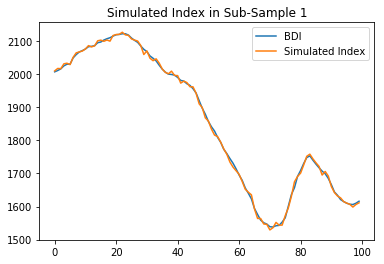

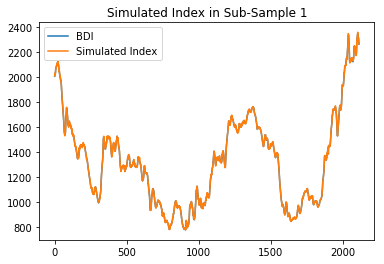

In [16]:
rbp3 = list(range((tp+20),sub1, rf))
rbpc3 = rbp3 + [sub1+1]
os3 = []
ossummary3 = []
oscoef3 = []
ossr3 = []

for i in range(0,len(rbp3)):
    os3.append(sm.OLS(BDI.Return[(rbp3[i]-tp):rbp3[i]],rdata[(rbp3[i]-tp):rbp3[i]]).fit())
    ossummary3.append(os3[i].summary())
    oscoef3.append(os3[i].params)

for i in rdata.columns:
    store = []
    for j in range(0,len(rbp3)):
        store = store + list(oscoef3[j][i]*np.array(rdata[i][rbpc3[j]:rbpc3[j+1]]))
    ossr3.append(store)

ospr3 = np.array(pd.DataFrame(ossr3).apply(lambda x: sum(x), axis=0))
ostr3 = np.std(ospr3 - np.array(BDI.Return[rbp3[0]:(sub1+1)]))
pstab3 = sm.OLS(pd.Series(np.array(BDI.Return[rbp3[0]:(sub1+1)]), np.arange(0,len(BDI.Return[rbp3[0]:(sub1+1)]))), pd.Series(ospr3, np.arange(0,len(ospr3)))).fit()
spstab3 = pstab3.summary()
pv3 = 2*(stats.t.cdf((pstab3.params[0]-1)/pstab3.bse[0],df = len(ospr3)-2))
osdf3 = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp3[0]:(sub1+1)]), "Portfolio Return": ospr3, "BDI": np.array(BDI.Price[rbp3[0]:(sub1+1)]), "Simulated Index": (1+ospr3)*np.array(BDI.Price[rbp3[0]:(sub1+1)])})

plt.plot(np.arange(0,100), osdf3["BDI Return"][0:100])
plt.plot(np.arange(0,100), osdf3["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 1")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), osdf3.BDI[0:100])
plt.plot(np.arange(0,100), osdf3["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 1")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,osdf3.shape[0]), osdf3.BDI)
plt.plot(np.arange(0,osdf3.shape[0]), osdf3["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 1")
plt.legend(loc = "best")
plt.show()

## Forecasting Rolling Window Regression

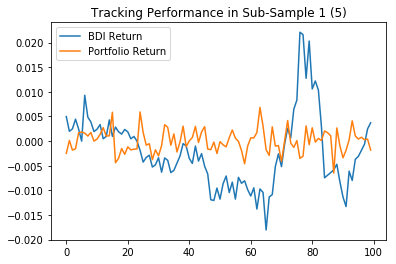

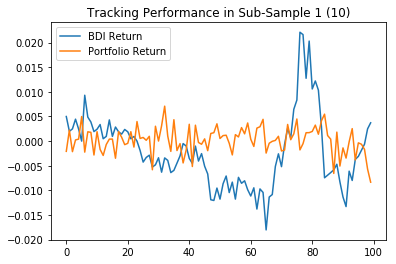

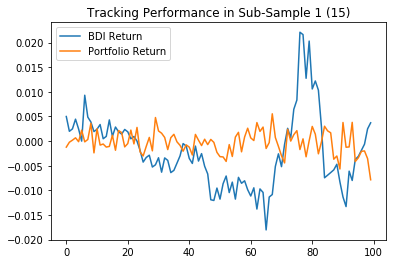

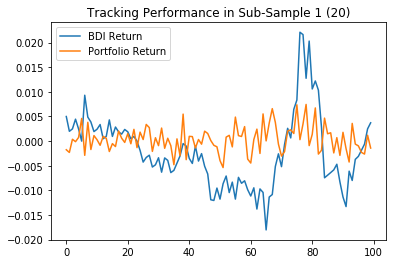

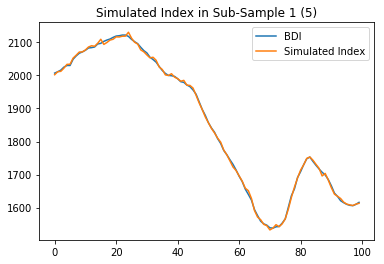

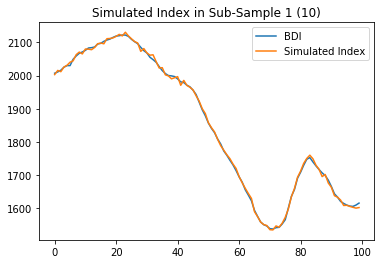

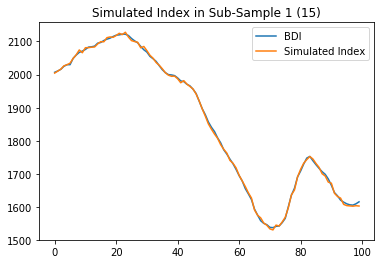

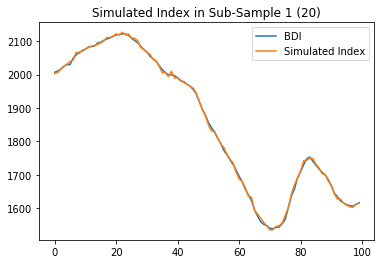

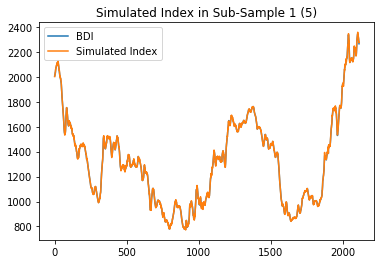

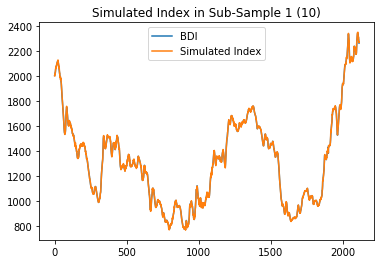

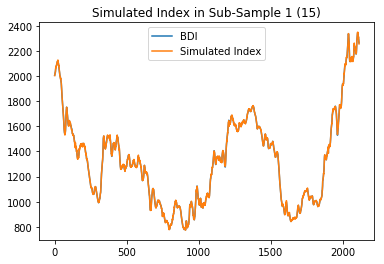

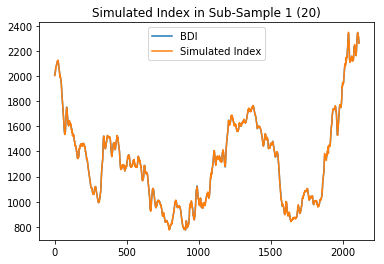

In [17]:
rbp4 = rbp3
rbpc4 = rbpc3
os4 = {}
oscoef4 = {}
ossr4 = {}
ospr4 = {}
ostr4 = {}
pstab4 = {}
spstab4 = {}
pv4 = {}
osdf4 = {}

for i in range(1,5):
    x = i * 5
    store1 = []
    store2 = []
    for j in range(0,len(rbp4)):
        regressor = rdata[(rbp4[j]-tp-x):(rbp4[j]-x)]
        regressor.index = np.arange(0, regressor.shape[0])
        store1.append(sm.OLS(pd.Series(np.array(BDI.Return[(rbp4[j]-tp):(rbp4[j])]), np.arange(0,len(BDI.Return[(rbp4[j]-tp):(rbp4[j])]))), regressor).fit())
        store2.append(store1[j].params)
    os4[str(x)] = store1
    oscoef4[str(x)] = store2

for i in range(1,5):
    x = i * 5
    store1 = []
    for j in rdata.columns:
        store2 = []
        for k in range(0,len(rbp4)):
            store2 = store2 + list(oscoef4[str(x)][k][j]*np.array(rdata[j][rbpc4[k]:rbpc4[k+1]]))
        store1.append(store2)
    ossr4[str(x)] = store1
    ospr4[str(x)] = np.array(pd.DataFrame(ossr4[str(x)]).apply(lambda x:sum(x), axis=0))
    ostr4[str(x)] = np.std(ospr4[str(x)] - np.array(BDI.Return[rbp4[0]:(sub1+1)]))
    pstab4[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[rbp4[0]:(sub1+1)]), np.arange(0,len(BDI.Return[rbp4[0]:(sub1+1)]))), pd.Series(ospr4[str(x)], np.arange(0,len(ospr4[str(x)])))).fit()
    spstab4[str(x)] = pstab4[str(x)].summary()
    pv4[str(x)] = 2*(stats.t.cdf((pstab4[str(x)].params[0]-1)/pstab4[str(x)].bse[0],df = len(ospr4[str(x)])-2))
    osdf4[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp4[0]:(sub1+1)]), "Portfolio Return": ospr4[str(x)], "BDI": np.array(BDI.Price[rbp4[0]:(sub1+1)]), "Simulated Index": (1+ospr4[str(x)])*np.array(BDI.Price[rbp4[0]:(sub1+1)])})

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf4[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), osdf4[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sample 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf4[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), osdf4[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sample 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,osdf4[str(x)].shape[0]), osdf4[str(x)].BDI)
    plt.plot(np.arange(0,osdf4[str(x)].shape[0]), osdf4[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sample 1 ({x})")
    plt.legend(loc = "best")
    plt.show()

# Sub-Sample 2 (2008/12/05-2017/11/30)
## Contemporaneous Rolling Window Regression

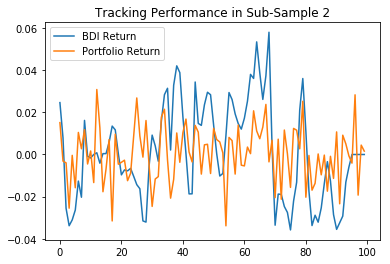

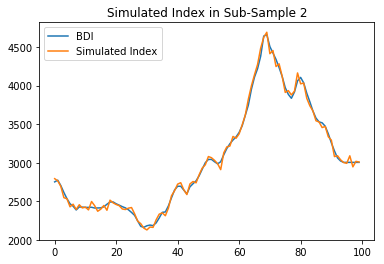

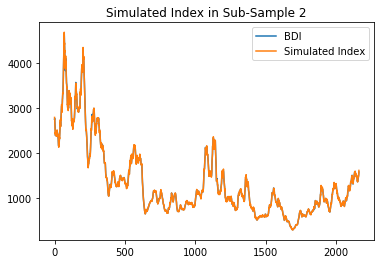

In [18]:
rbp5 = list(range((sub2+tp+20),rdata.shape[0], rf))
rbpc5 = rbp5 + [rdata.shape[0]+1]
os5 = []
ossummary5 = []
oscoef5 = []
ossr5 = []

for i in range(0,len(rbp5)):
    os5.append(sm.OLS(BDI.Return[(rbp5[i]-tp):rbp5[i]],rdata[(rbp5[i]-tp):rbp5[i]]).fit())
    ossummary5.append(os5[i].summary())
    oscoef5.append(os5[i].params)

for i in rdata.columns:
    store = []
    for j in range(0,len(rbp5)):
        store = store + list(oscoef5[j][i]*np.array(rdata[i][rbpc5[j]:rbpc5[j+1]]))
    ossr5.append(store)

ospr5 = np.array(pd.DataFrame(ossr5).apply(lambda x: sum(x), axis=0))
ostr5 = np.std(ospr5 - np.array(BDI.Return[rbp5[0]:]))
pstab5 = sm.OLS(pd.Series(np.array(BDI.Return[rbp5[0]:]), np.arange(0,len(BDI.Return[rbp5[0]:]))), pd.Series(ospr5, np.arange(0,len(ospr5)))).fit()
spstab5 = pstab5.summary()
pv5 = 2*(stats.t.cdf((pstab5.params[0]-1)/pstab5.bse[0],df = len(ospr5)-2))
osdf5 = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp5[0]:]), "Portfolio Return": ospr5, "BDI": np.array(BDI.Price[rbp5[0]:]), "Simulated Index": (1+ospr5)*np.array(BDI.Price[rbp5[0]:])})

plt.plot(np.arange(0,100), osdf5["BDI Return"][0:100])
plt.plot(np.arange(0,100), osdf5["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), osdf5.BDI[0:100])
plt.plot(np.arange(0,100), osdf5["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,osdf5.shape[0]), osdf5.BDI)
plt.plot(np.arange(0,osdf5.shape[0]), osdf5["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 2")
plt.legend(loc = "best")
plt.show()

## Forecasting Rolling Window Regression

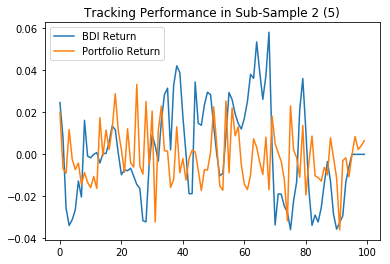

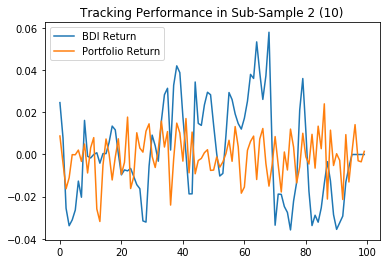

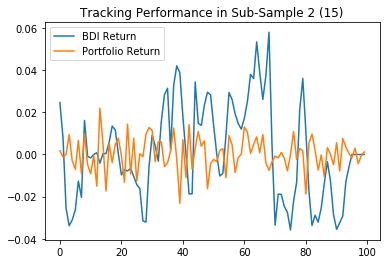

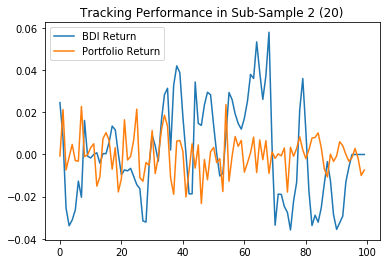

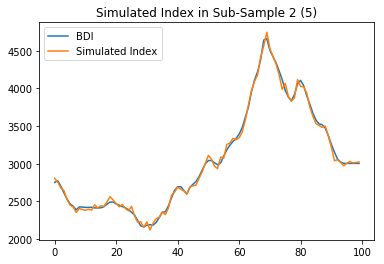

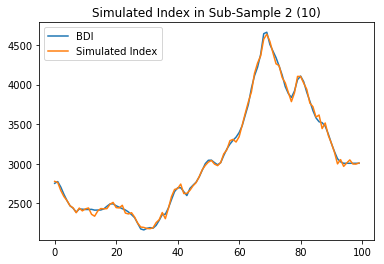

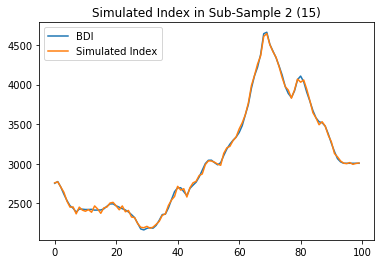

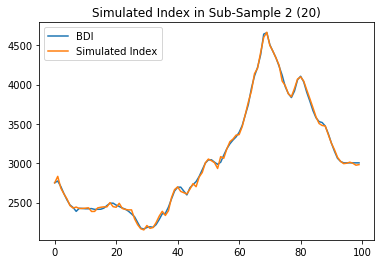

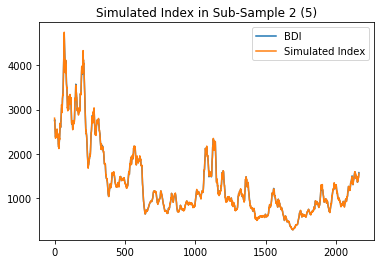

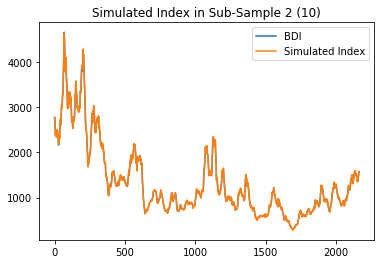

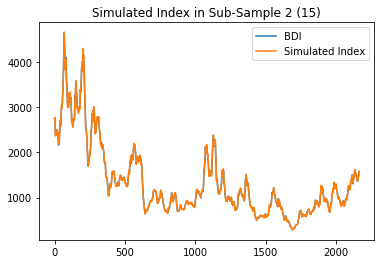

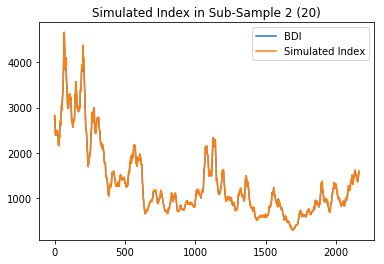

In [19]:
rbp6 = rbp5
rbpc6 = rbpc5
os6 = {}
oscoef6 = {}
ossr6 = {}
ospr6 = {}
ostr6 = {}
pstab6 = {}
spstab6 = {}
pv6 = {}
osdf6 = {}

for i in range(1,5):
    x = i * 5
    store1 = []
    store2 = []
    for j in range(0,len(rbp6)):
        regressor = rdata[(rbp6[j]-tp-x):(rbp6[j]-x)]
        regressor.index = np.arange(0, regressor.shape[0])
        store1.append(sm.OLS(pd.Series(np.array(BDI.Return[(rbp6[j]-tp):(rbp6[j])]), np.arange(0,len(BDI.Return[(rbp6[j]-tp):(rbp6[j])]))), regressor).fit())
        store2.append(store1[j].params)
    os6[str(x)] = store1
    oscoef6[str(x)] = store2

for i in range(1,5):
    x = i * 5
    store1 = []
    for j in rdata.columns:
        store2 = []
        for k in range(0,len(rbp6)):
            store2 = store2 + list(oscoef6[str(x)][k][j]*np.array(rdata[j][rbpc6[k]:rbpc6[k+1]]))
        store1.append(store2)
    ossr6[str(x)] = store1
    ospr6[str(x)] = np.array(pd.DataFrame(ossr6[str(x)]).apply(lambda x:sum(x), axis=0))
    ostr6[str(x)] = np.std(ospr6[str(x)] - np.array(BDI.Return[rbp6[0]:]))
    pstab6[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[rbp6[0]:]), np.arange(0,len(BDI.Return[rbp6[0]:]))), pd.Series(ospr6[str(x)], np.arange(0,len(ospr6[str(x)])))).fit()
    spstab6[str(x)] = pstab6[str(x)].summary()
    pv6[str(x)] = 2*(stats.t.cdf((pstab6[str(x)].params[0]-1)/pstab6[str(x)].bse[0],df = len(ospr6[str(x)])-2))
    osdf6[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp6[0]:]), "Portfolio Return": ospr6[str(x)], "BDI": np.array(BDI.Price[rbp6[0]:]), "Simulated Index": (1+ospr6[str(x)])*np.array(BDI.Price[rbp6[0]:])})

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf6[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), osdf6[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sample 2 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf6[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), osdf6[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sample 2 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,osdf6[str(x)].shape[0]), osdf6[str(x)].BDI)
    plt.plot(np.arange(0,osdf6[str(x)].shape[0]), osdf6[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sample 2 ({x})")
    plt.legend(loc = "best")
    plt.show()

# Sub-Sample 2 (2003/09/01-2008/12/04)
## Contemporaneous Rolling Window Regression

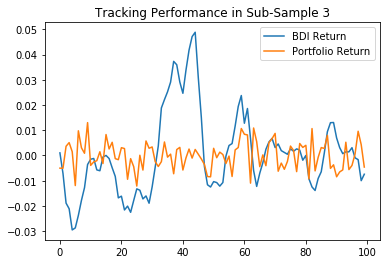

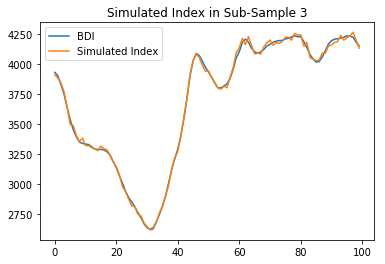

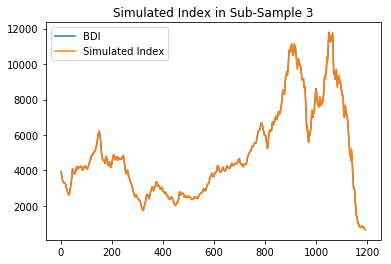

In [20]:
rbp7 = list(range((sb1+tp+20),sb2, rf))
rbpc7 = rbp7 + [sb2+1]
os7 = []
ossummary7 = []
oscoef7 = []
ossr7 = []

for i in range(0,len(rbp7)):
    os7.append(sm.OLS(BDI.Return[(rbp7[i]-tp):rbp7[i]],rdata[(rbp7[i]-tp):rbp7[i]]).fit())
    ossummary7.append(os7[i].summary())
    oscoef7.append(os7[i].params)

for i in rdata.columns:
    store = []
    for j in range(0,len(rbp7)):
        store = store + list(oscoef7[j][i]*np.array(rdata[i][rbpc7[j]:rbpc7[j+1]]))
    ossr7.append(store)

ospr7 = np.array(pd.DataFrame(ossr7).apply(lambda x: sum(x), axis=0))
ostr7 = np.std(ospr7 - np.array(BDI.Return[rbp7[0]:(sb2+1)]))
pstab7 = sm.OLS(pd.Series(np.array(BDI.Return[rbp7[0]:(sb2+1)]), np.arange(0,len(BDI.Return[rbp7[0]:(sb2+1)]))), pd.Series(ospr7, np.arange(0,len(ospr7)))).fit()
spstab7 = pstab7.summary()
pv7 = 2*(stats.t.cdf((pstab7.params[0]-1)/pstab7.bse[0],df = len(ospr7)-2))
osdf7 = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp7[0]:(sb2+1)]), "Portfolio Return": ospr7, "BDI": np.array(BDI.Price[rbp7[0]:(sb2+1)]), "Simulated Index": (1+ospr7)*np.array(BDI.Price[rbp7[0]:(sb2+1)])})

plt.plot(np.arange(0,100), osdf7["BDI Return"][0:100])
plt.plot(np.arange(0,100), osdf7["Portfolio Return"][0:100])
plt.title("Tracking Performance in Sub-Sample 3")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,100), osdf7.BDI[0:100])
plt.plot(np.arange(0,100), osdf7["Simulated Index"][0:100])
plt.title("Simulated Index in Sub-Sample 3")
plt.legend(loc = "best")
plt.show()

plt.plot(np.arange(0,osdf7.shape[0]), osdf7.BDI)
plt.plot(np.arange(0,osdf7.shape[0]), osdf7["Simulated Index"])
plt.title("Simulated Index in Sub-Sample 3")
plt.legend(loc = "best")
plt.show()

## Forecasting Rolling Window Regression

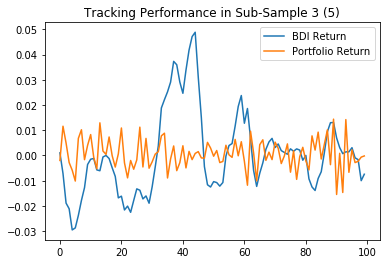

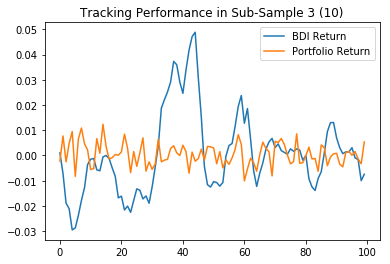

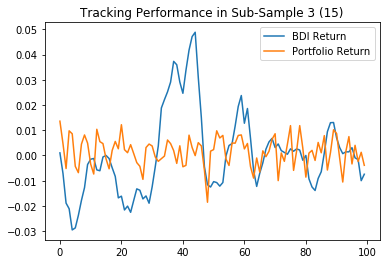

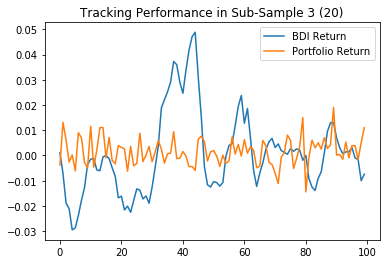

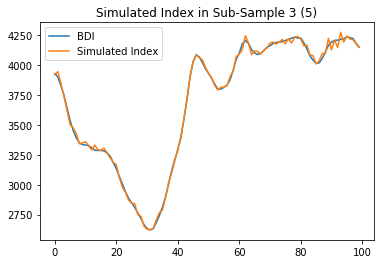

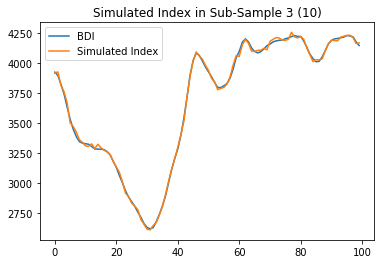

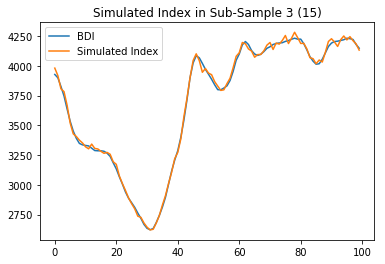

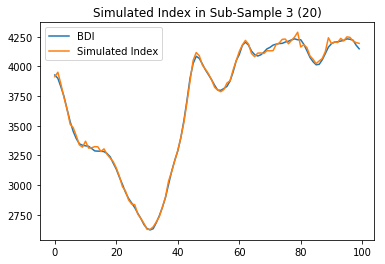

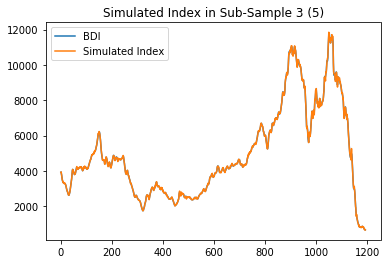

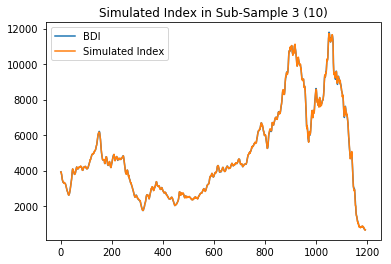

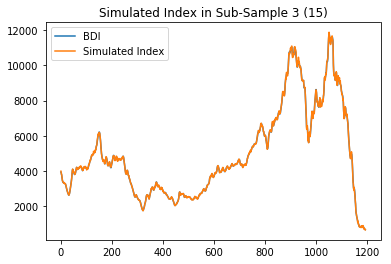

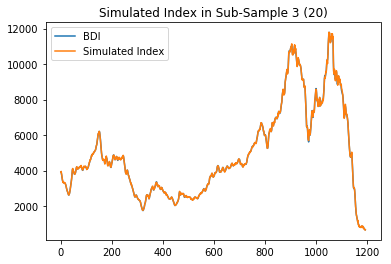

In [21]:
rbp8 = rbp7
rbpc8 = rbpc7
os8 = {}
oscoef8 = {}
ossr8 = {}
ospr8 = {}
ostr8 = {}
pstab8 = {}
spstab8 = {}
pv8 = {}
osdf8 = {}

for i in range(1,5):
    x = i * 5
    store1 = []
    store2 = []
    for j in range(0,len(rbp8)):
        regressor = rdata[(rbp8[j]-tp-x):(rbp8[j]-x)]
        regressor.index = np.arange(0, regressor.shape[0])
        store1.append(sm.OLS(pd.Series(np.array(BDI.Return[(rbp8[j]-tp):(rbp8[j])]), np.arange(0,len(BDI.Return[(rbp8[j]-tp):(rbp8[j])]))), regressor).fit())
        store2.append(store1[j].params)
    os8[str(x)] = store1
    oscoef8[str(x)] = store2

for i in range(1,5):
    x = i * 5
    store1 = []
    for j in rdata.columns:
        store2 = []
        for k in range(0,len(rbp8)):
            store2 = store2 + list(oscoef8[str(x)][k][j]*np.array(rdata[j][rbpc8[k]:rbpc8[k+1]]))
        store1.append(store2)
    ossr8[str(x)] = store1
    ospr8[str(x)] = np.array(pd.DataFrame(ossr8[str(x)]).apply(lambda x:sum(x), axis=0))
    ostr8[str(x)] = np.std(ospr8[str(x)] - np.array(BDI.Return[rbp8[0]:(sb2+1)]))
    pstab8[str(x)] = sm.OLS(pd.Series(np.array(BDI.Return[rbp8[0]:(sb2+1)]), np.arange(0,len(BDI.Return[rbp8[0]:(sb2+1)]))), pd.Series(ospr8[str(x)], np.arange(0,len(ospr8[str(x)])))).fit()
    spstab8[str(x)] = pstab8[str(x)].summary()
    pv8[str(x)] = 2*(stats.t.cdf((pstab8[str(x)].params[0]-1)/pstab8[str(x)].bse[0],df = len(ospr8[str(x)])-2))
    osdf8[str(x)] = pd.DataFrame({"BDI Return":np.array(BDI.Return[rbp8[0]:(sb2+1)]), "Portfolio Return": ospr8[str(x)], "BDI": np.array(BDI.Price[rbp8[0]:(sb2+1)]), "Simulated Index": (1+ospr8[str(x)])*np.array(BDI.Price[rbp8[0]:(sb2+1)])})

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf8[str(x)]["BDI Return"][0:100])
    plt.plot(np.arange(0,100), osdf8[str(x)]["Portfolio Return"][0:100])
    plt.title(f"Tracking Performance in Sub-Sample 3 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,100), osdf8[str(x)].BDI[0:100])
    plt.plot(np.arange(0,100), osdf8[str(x)]["Simulated Index"][0:100])
    plt.title(f"Simulated Index in Sub-Sample 3 ({x})")
    plt.legend(loc = "best")
    plt.show()

for i in range(1,5):
    x = i * 5
    plt.plot(np.arange(0,osdf8[str(x)].shape[0]), osdf8[str(x)].BDI)
    plt.plot(np.arange(0,osdf8[str(x)].shape[0]), osdf8[str(x)]["Simulated Index"])
    plt.title(f"Simulated Index in Sub-Sample 3 ({x})")
    plt.legend(loc = "best")
    plt.show()